<a href="https://colab.research.google.com/github/RyuMyunggi/data-structure/blob/main/heap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## heap: 힙
* 힙은 각 노드가 하위 노드보다 작은(또는 큰) 이진트리임
* 최대값과 최솟값을 빠르게 찾기 위해 고안 된 자료구조. 일반적으로 리스트에서 가장 작은 (또는 가장 큰) 반복적으로 접근하는 프로그램에 유용
* 일반 스택과 큐와 비슷한 추상 데이터 타입이지만 각 항목 마다 연관된 우선 순위가 있음
* 각 노드의 key 값이 해당 노드의 자식 노드의 key 값보다 작지 않거나 크지 않은 완전 이진트리
* 키 값의 대소관계는 부모-자식 노드 사이 간에만 성립. 형제 노드 사이에는 영향을 미치지 않음
  * A가 B의 부모노드이면 A의 키 값과 B의 키 값 사이에는 대소 관계가 성립
* 자식 노드의 최대 개수는 힙의 종류에 따라 다르지만 이진트리에서는 최대 2개 
* i번째 노드의 자식 노드가 2개인데 왼쪽 자식 노드는 2i 오른쪽 자식 노드는  2i + 1이고 부모 노드는 i/2
* 최소 힙: 부모 노드의 키 값이 자식 노드의 키 값보다 항상 작은 힙
* 최대 힙: 부모 노드의 키 값이 자식 노드의 키 값보다 항상 큰 힙

## 파이썬과 heap
* 파이썬은 힙큐 모듈을 제공. 일반적인 리스트를 min heap처럼 다룰 수 있게 해줌
* heapq.heapify()를 사용하면 O(n)시간에 리스트를 힙으로 바꿀 수 있음 

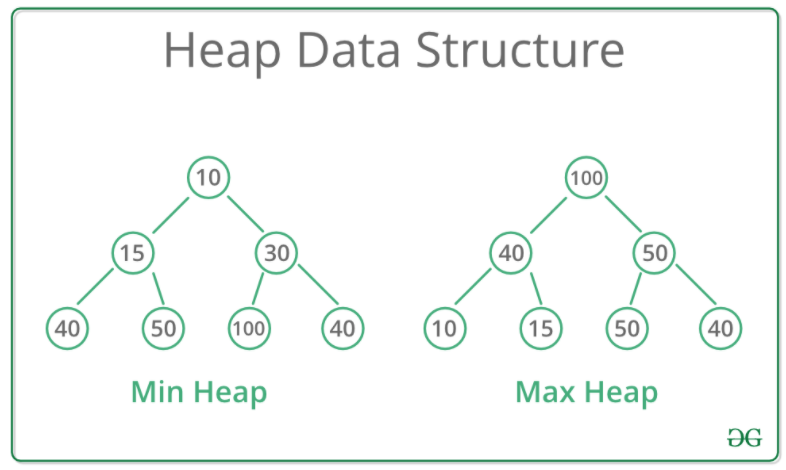

In [14]:
## heapq module
import heapq

## heap method

## 노드 추가
## heapq.heappush(heap, item)
heap = []
heapq.heappush(heap, 9)
heapq.heappush(heap, 1)
heapq.heappush(heap, 5)
print('heappush: ', heap)

## 노드 삭제
## heappop은 힙에서 가장 작은 항목을 제거하고 반환. 비어있는 경우 IndexError가 호출
heapq.heappop(heap)
print('heappop: ', heap)

## 새 항목 추가 및 가장 작은 항목 제거하고 반환
## heapq.heappushpop
heapq.heappushpop(heap, 10)
print('heappushpop: ', heap)

## 힙의 가장 작은 항목을 제거하고 반환 한 후, 새 항목 추가
## heappush
heapq.heapreplace(heap, 1)
print('heapreplace :', heap)

## 기존의 리스트 힙으로 변환하기. heapify
temp_list = [1, 2, 3, 4, 5]
heapq.heapify(temp_list)
print('heapify: ', temp_list)

heappush:  [1, 9, 5]
heappop:  [5, 9]
heappushpop:  [9, 10]
heapreplace : [1, 10]
heapify:  [1, 2, 3, 4, 5]


In [20]:
## 최대 힙 구현하기

class Heapify(object):
  def __init__(self, data=None):
    self.data = data
    for i in range(len(self.data)//2, -1, -1):
      self.__max_heapify__(i)

  def __repr__(self):
    return repr

  ## 파이썬 비트연산자 <<, >>: https://heestory217.tistory.com/81
  def parent(self, i):
    if i&1:
      return i >> i
    else:
      return (i >> 1) - 1

  def left_child(self, i):
    return (i << 1) + 1

  def right_child(self, i):
    return (i << 1) + 2

  def __max_heapify__(self, i):
    largest = i # 현재노드
    left = self.left_child(i)
    right = self.right_child(i)
    n = len(self.data)

    # 왼쪽 자식
    largest = (left < n and self.data[left] > self.data[i] and left or i)
    # 오른쪽 자식
    largest = (right < n and self.data[right] > self.data[largest] and right or largest)

    # 현재 노드가 자식들보다 크다면 skip, 자식이 크다면 swap
    if i is not largest:
      self.data[i], self.data[largest] = self.data[largest], self.data[i]
      self.__max_heapify__(largest)
  
  def extract_max(self):
    n = len(self.data)
    max_element = self.data[0]
    # 첫 번째 노드에 마지막 노드를 삽입
    self.data[0] = self.data[n-1]
    self.data = self.data[:n-1]
    self.__max_heapify__(0)
    return max_element
  
  def insert(self, item):
    i = len(self.data)
    self.data.append(item)
    while (i != 0) and item > self.data[self.parent(i)]:
      print(self.data)
      self.data[i] = self.data[self.parent(i)]
      i = self.parent(i)
    self.data[i] = item
    
def test_heapify():
  l1 = [3, 2, 5, 1, 7, 8, 2]
  h = Heapify(l1)
  assert(h.extract_max() == 8)
  print('테스트 통과!')

test_heapify()


테스트 통과!


## 최대 힙 구현하기 
1. 인덱스 0의 자식은 인덱스 1, 2이고, 1의 자식은 3,4이고 2의 자식은 5, 6. 노드 i의 왼쪽 자식 노드의 인덱스는 (i * 2) + 1이고, i의 오른쪽 자식 노드의 인덱스는 (i * 2) + 2
2. 전체 배열의 길이를 반으로 나누는 것으로 시작
3. 인덱스가 3일 때 자식이 없으므로 넘어감
4. 인덱스가 2일 때 자식이 있고 값 5보다 큰 값 8이 존재하므로 인덱스 2와 5의 값을 교환. 교환한 인덱스 5를 다시 자식들과 비교하는데 자식이 없으므로 넘어감
5. 인덱스가 1일때 값 2보다 큰 값 7인 자식이 존재하므로 인덱스 1과 4의 값을 교환. 교환한 인덱스 4를 다시 자식들과 비교하는데 자식이 없으므로 넘어감
6. 인덱스가 0일 때, 값 3보다 큰 값 8인 자식이 존재하므로 인덱스 0과 2의 값을 교환
6-1. 교환한 인덱스 2의 자식에서 값 3보다 큰 값 5가 존재하므로 인덱스 2와 5의 값을 교환. 교환한 인덱스 5의 자식이 없으므로 넘어감
7. 인덱스 0까지 비교를 마쳤으므로 프로그램을 종료